In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
hist_trans_df = pd.read_csv("E:\DSE\DataStorm 4.0\DataStorm077\data-storm-4\Historical-transaction-data.csv")
store_info_df = pd.read_csv('E:\DSE\DataStorm 4.0\DataStorm077\data-storm-4\Store-info.csv')
test_df = pd.read_csv('E:\DSE\DataStorm 4.0\DataStorm077\data-storm-4\Testing-data.csv')

In [67]:
hist_trans_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


Merge two csv files based on shop_id

In [68]:
df = pd.merge(hist_trans_df, store_info_df, on='shop_id' ,how='right')

In [69]:
df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
0,SODA 1L,2021-10-17T00:00:00.000Z,30956.0,4OFQ,SHOP047,110,1,528,Moderate
1,ORANGE BARLEY 1.5L,2021-10-20T00:00:00.000Z,31418.0,KQYP,SHOP047,220,1,528,Moderate
2,GINGER BEER 1.5L,2021-11-01T00:00:00.000Z,33467.0,WCZT,SHOP047,220,2,528,Moderate
3,FIT O MIXED FRUIT 200ML,2021-11-06T00:00:00.000Z,34265.0,KD8T,SHOP047,60,1,528,Moderate
4,GINGER BEER 1.5L,2021-11-06T00:00:00.000Z,34265.0,KD8T,SHOP047,220,2,528,Moderate


<Axes: >

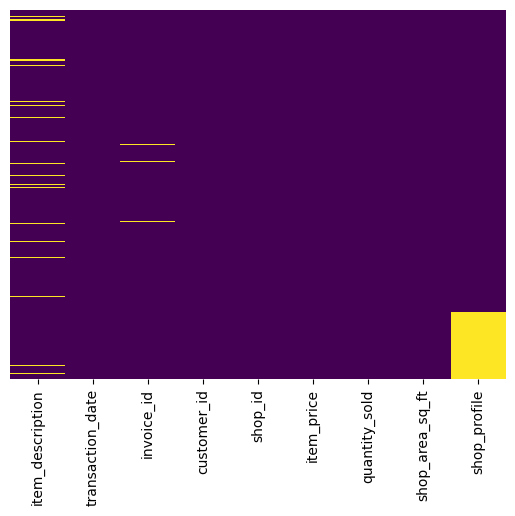

In [70]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [71]:
df.shape

(473974, 9)

quantity sold by each shop

In [72]:
temp = pd.DataFrame(hist_trans_df.groupby('shop_id')['quantity_sold'].sum()).reset_index()
temp.rename(columns={'quantity_sold': 'quantity_sold_per_shop'}, inplace=True)

df = pd.merge(df, temp, on='shop_id', how='left')

In [73]:
# # total income per store monthly 
# temp_df = pd.DataFrame()
# temp_df['total'] = df['quantity_sold'] * df['item_price']
# temp_df = pd.concat([df, temp_df], axis=1)

# new_df = pd.DataFrame(temp_df.groupby(['shop_id', 'month'])['total'].sum()).reset_index()

# df = pd.merge(df, new_df, on=['shop_id', 'month'], how='left')
# df

In [74]:
# drop rows with null values in the "shopprofile" column
df1 = df.dropna(subset=["shop_profile"])

In [75]:
df1.shape

(387341, 10)

<Axes: >

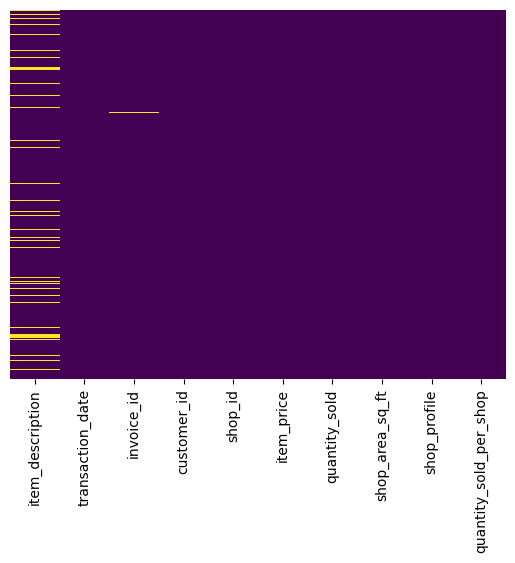

In [76]:
sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [77]:
df2 = df[df["shop_profile"].isna()]

In [78]:
df2.shape

(86633, 10)

In [79]:
from sklearn.model_selection import train_test_split
# split the dataset into training and testing sets
train_df, test_df = train_test_split(df1, test_size=0.3, random_state=42)

In [80]:
train_df.shape

(271138, 10)

In [81]:
test_df.shape

(116203, 10)

In [82]:
# Drop the "shop_profile" column
X_train = train_df.drop("shop_profile", axis=1)
X_test = test_df.drop("shop_profile", axis=1)

In [83]:
X_train.shape

(271138, 9)

In [84]:
Y_train = train_df['shop_profile']
Y_test = test_df['shop_profile']

In [85]:
Y_train.head

<bound method NDFrame.head of 296007        High
174362        High
372916        High
359793         Low
111226         Low
            ...   
259178        High
365838    Moderate
131932    Moderate
146867         Low
121958         Low
Name: shop_profile, Length: 271138, dtype: object>

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Create a Random Forest Classifier with 100 trees
rf = RandomForestClassifier(n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_depth=10, bootstrap=False)

# Train the model using the training data
rf.fit(X_train.drop(["item_description","invoice_id","customer_id","shop_id","transaction_date","quantity_sold"], axis=1), Y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=2,
                       n_estimators=700)

In [87]:
# Make predictions on the testing data
y_pred = rf.predict(X_test.drop(["item_description","invoice_id","customer_id","shop_id","transaction_date","quantity_sold"], axis=1))

# Evaluate the performance of the model using the F1 score
f1 = f1_score(Y_test, y_pred, average='macro')
print("F1 score:", f1)

F1 score: 0.9837456608961871
